# Data Set

A relação da venda de produtos de uma loja, onde ele é representado pelos seguintes atributos:
- TV: Orçamento disponível para promover via TV (em Milhões).
- Radio: Orçamento disponível para promover via radio (em Milhões).
- Social Media: Promoção via rede social (em Milhões).
- Influencer: Se a pessoa que ira pomover é um:
    - Mega: Mínimo 1 milhão de seguidores
    - Macro: 500 mil a 1 milhão de seguidores
    - Micro: 10 mil a 500 mil seguidores
    - Nano: 1 mil e 10 mil seguidores 
- Sales: Ganho bruto (em Milhões). **Atributo Dependente**

## Como os dados estão clusterizados

Os dados estão relacionados atráves do Orçamento gasto no Marketing na TV, RADIO e SOCIAL_MEDIA em relação ao aumento de Sales da Loja. Onde o investimento no Marketing afeta diretamente no Sales da Loja. 


In [2]:
# Importando o dataset
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

dataset = pd.read_csv("Marketing_and_Sales.csv")

# Tratando os dados


In [3]:
# Vendo a ocorrencia de NULL em todas as features do dataset
dataset.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [4]:
# Tratando os campos nulos da Tabela

dataset.isna().sum()

dataset["TV"].fillna(dataset["TV"].median(), inplace=True)
dataset["Social Media"].fillna(dataset["Social Media"].median(), inplace=True)
dataset["Radio"].fillna(dataset["Radio"].median(), inplace=True)


dataset.isna().sum()


TV              0
Radio           0
Social Media    0
Influencer      0
Sales           6
dtype: int64

In [5]:
# Cell para olhar as features da tabela 
dataset.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [6]:
# Pegar os atributos do database e Remover o atributo dependende 

# X = pd.DataFrame(dataset.iloc[:,:-1])

# # Pegar o atributo dependente
# y = pd.DataFrame(dataset.iloc[:,-1])

# Pegar os atributos do database e Remover o atributo dependende 



# Pegar o atributo dependente
y = pd.DataFrame(dataset["Sales"])
dataset = dataset.drop("Sales", axis=1)
dataset = pd.get_dummies(dataset)

X = dataset




<Axes: >

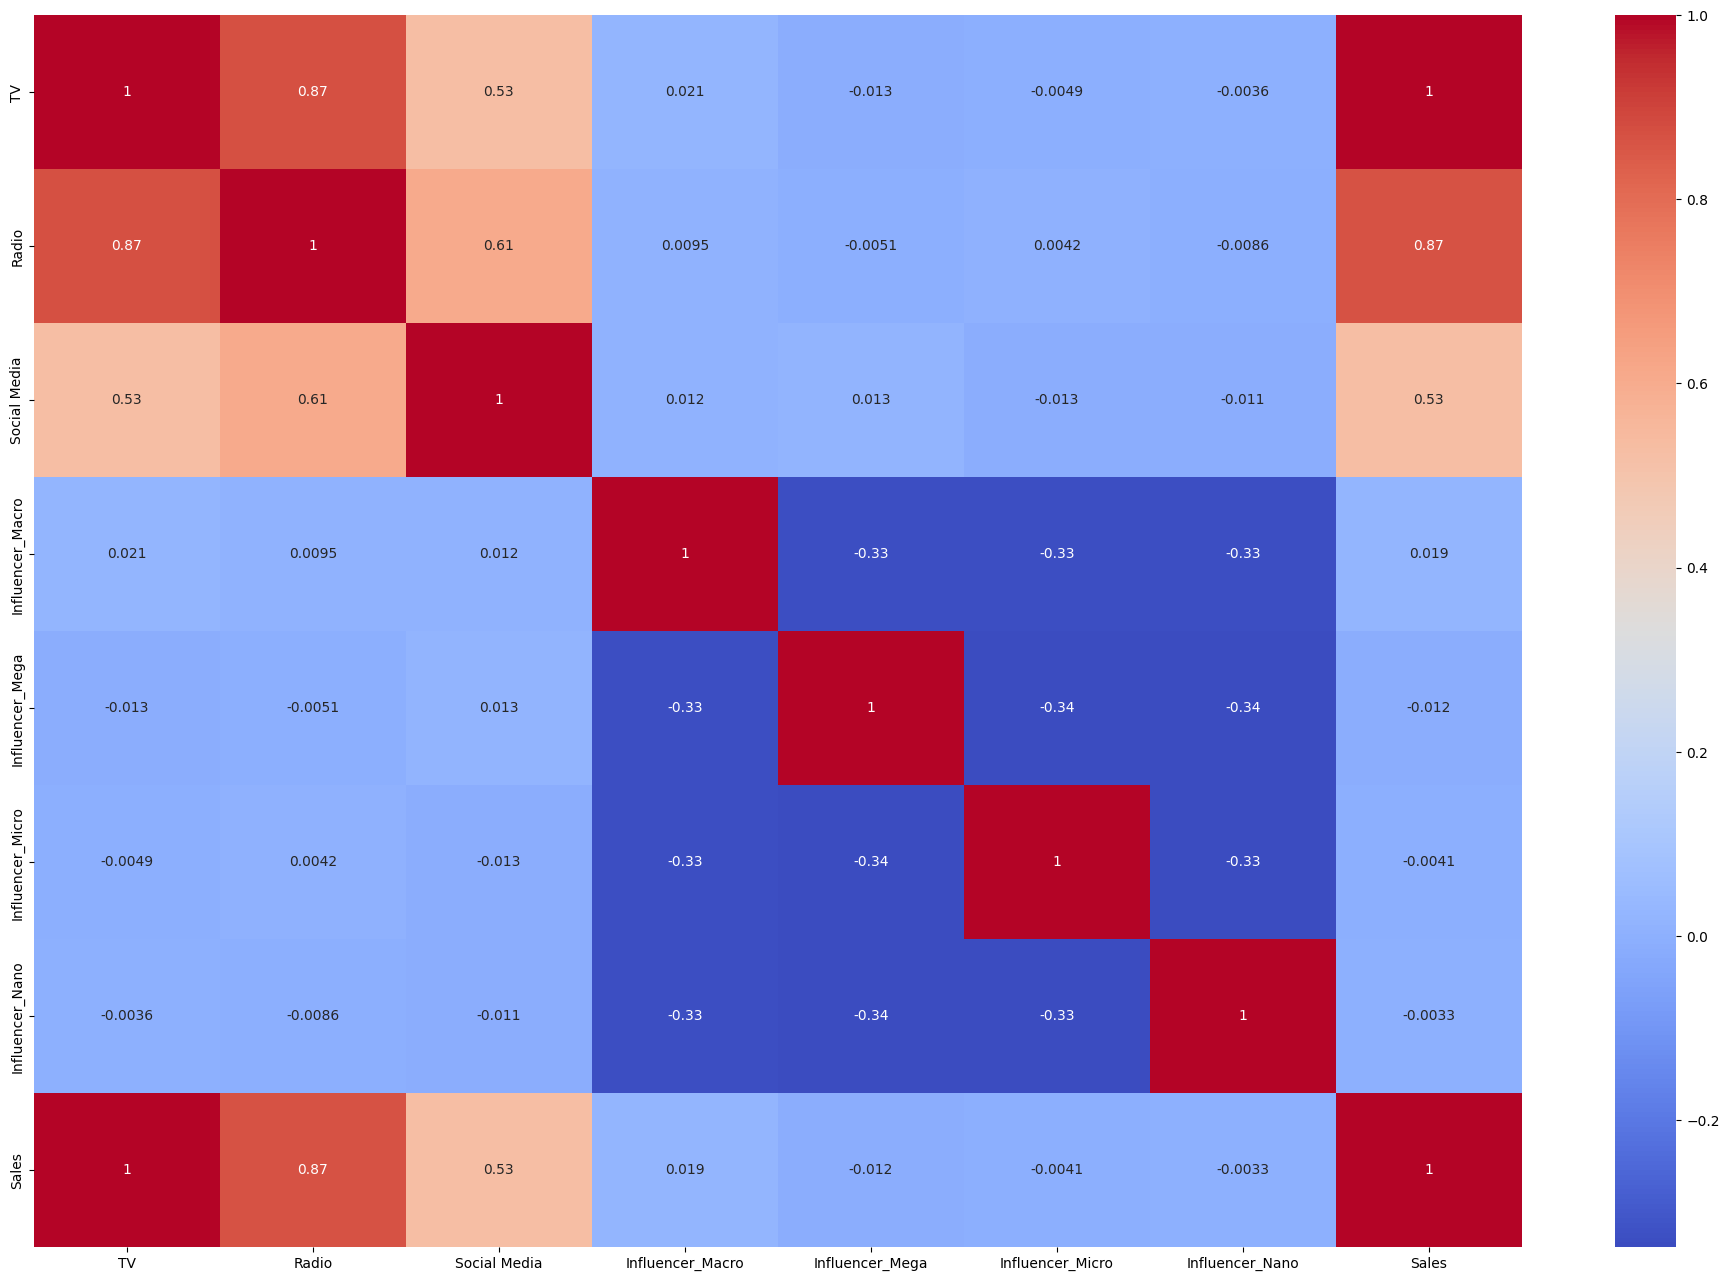

In [8]:
#  Convertendo as labels em números
#  Obs: Fazer isso para as que são do tipo Obj
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Marketing_and_Sales.csv")

df_dummie = pd.get_dummies(df)

#  Extraindo o dados a ser analizado (DEPEDENTE)

y = df_dummie["Sales"]
df = df_dummie.drop(columns=["Sales"], axis=1)

# Plotando a Mariz Correlacional para ver a relação do DEPENDENTE

# plt.figure(figsize=(24,16))
# sn.heatmap(pd.concat([df,y],axis=1).corr(), annot=True, cmap="coolwarm")

In [9]:
X

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,False,True,False,False
1,13.0,9.237765,2.409567,False,True,False,False
2,41.0,15.886446,2.913410,False,True,False,False
3,83.0,30.020028,6.922304,False,True,False,False
4,15.0,8.437408,1.405998,False,False,True,False
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,False,False,True,False
4568,71.0,20.610685,6.545573,False,False,False,True
4569,44.0,19.800072,5.096192,False,False,True,False
4570,71.0,17.534640,1.940873,True,False,False,False


In [33]:
y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4572, dtype: float64

In [52]:
y.median(axis=0)
y = y.fillna(y.median())
y.isna().sum()

0

In [36]:
# Fazendo um One Hot enconder da feature Influencer para os valores =[Nano, Micro, Macro e Mega]
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# X = pd.DataFrame(X)


# Treinamento do Modelo

In [53]:
#  Analisar sobre a influencia do Marketing nos canais de Comunicação  na Vendas
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Regressão Linear

In [65]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [67]:
# Os valores previstos 20% de dados
y_pred = regressor.predict(X_test)

y_pred

array([ 91.78685894, 219.23217144, 103.72435894, 327.25560894,
       353.51342144, 263.81029644, 352.94310894, 138.38842144,
       263.84935894,  53.13060894, 133.60717144, 116.41967144,
       313.13842144, 192.48217144, 155.88842144, 299.82592144,
       248.26342144, 114.28685894, 299.58373394, 238.59935894,
       187.82592144, 348.44310894, 114.56810894,  96.84935894,
       159.66185894, 352.04467144,  59.04467144, 168.82592144,
       227.54467144, 354.70092144, 256.09935894, 163.41967144,
       347.23217144, 278.14623394,  65.40404644,  50.94310894,
        82.16967144, 319.98217144, 120.51342144, 245.63060894,
       273.57592144, 149.16185894, 154.74779644, 163.13842144,
       337.51342144, 288.61498394, 242.81810894,  42.32592144,
       270.13842144, 328.00560894, 150.03685894, 257.67748394,
       221.53685894, 125.38842144, 216.66967144,  39.45873394,
        75.89623394, 225.77904644, 241.54467144, 132.66967144,
       192.70092144,  86.50560894,  85.47435894, 136.69

In [68]:
y_test

538      90.054222
1822    222.741668
534     102.774790
2119    328.239378
561     351.807328
           ...    
744     244.865923
733     130.478749
2647    251.403637
4149    253.172404
3819    250.151755
Name: Sales, Length: 915, dtype: float64

In [69]:
from sklearn import metrics

print(f"R2: {metrics.r2_score(y_test, y_pred)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)} ")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)} ")

R2: 0.992102885606643
MAE: 2.8707296464054872 
MSE: 65.91031340499629 


# Gradiente


In [61]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from sklearn.linear_model import SGDRegressor

#APlicando o Gradiente e usando hiper parametros
sgd_regressor = SGDRegressor(max_iter=1000, alpha=0.0001, random_state=42)
sgd_regressor.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [63]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = sgd_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"R2: {r2}")
print(f"MSE: {mse} ")

R2: 0.9921079624283945
MSE: 65.86794160992294 
